In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/marketing-ab-testing/marketing_AB.csv


In [3]:
df = pd.read_csv('/kaggle/input/marketing-ab-testing/marketing_AB.csv')
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df.duplicated(subset = 'user id').sum()

0

In [6]:
df.drop(['Unnamed: 0','user id'], axis = 1, inplace = True)
df

,test group,converted,total ads,most ads day,most ads hour
0,ad,False,130,Monday,20
1,ad,False,93,Tuesday,22
2,ad,False,21,Tuesday,18
3,ad,False,355,Tuesday,10
4,ad,False,276,Friday,14
...,...,...,...,...,...
588096,ad,False,1,Tuesday,23
588097,ad,False,1,Tuesday,23
588098,ad,False,3,Tuesday,23
588099,ad,False,1,Tuesday,23


In [7]:
#most ads hour is categorical feature as 20 corresponds to 8 PM and so on
df_cat = df[['test group', 'converted', 'total ads','most ads day', 'most ads hour']]
df_cat.nunique()

test group         2
converted          2
total ads        807
most ads day       7
most ads hour     24
dtype: int64

Text(0.5, 1.0, 'Count Plot test group')

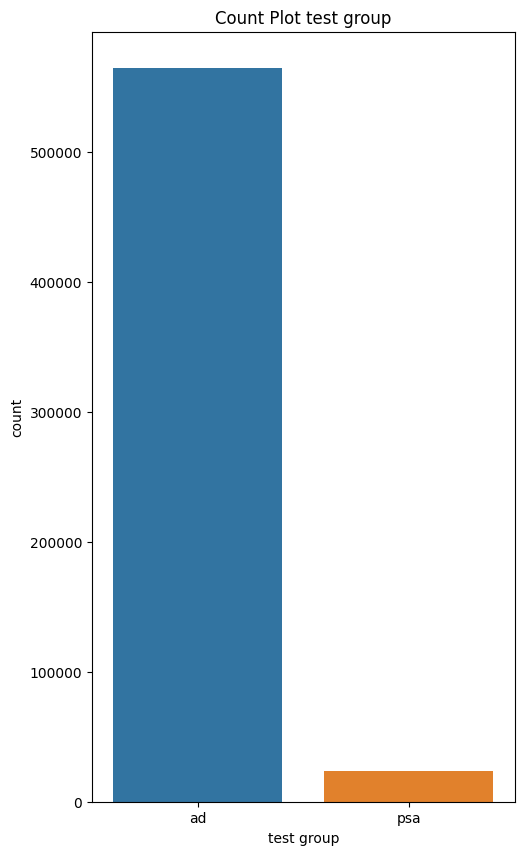

In [8]:
variable = 'test group'

plt.figure(figsize = (12, 10))
plt.subplot(1, 2, 1)
sns.countplot(x = variable, data = df_cat)
plt.title(f"Count Plot {variable}")

Text(0.5, 1.0, 'Pie Chart test group')

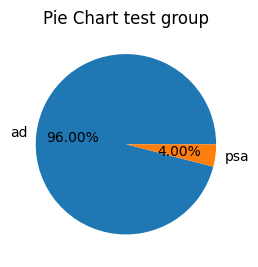

In [9]:
plt.subplot(1, 2, 2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels = counts.index, autopct = '%0.2f%%')
plt.title(f"Pie Chart {variable}")

Text(0.5, 1.0, 'Pie Chart converted')

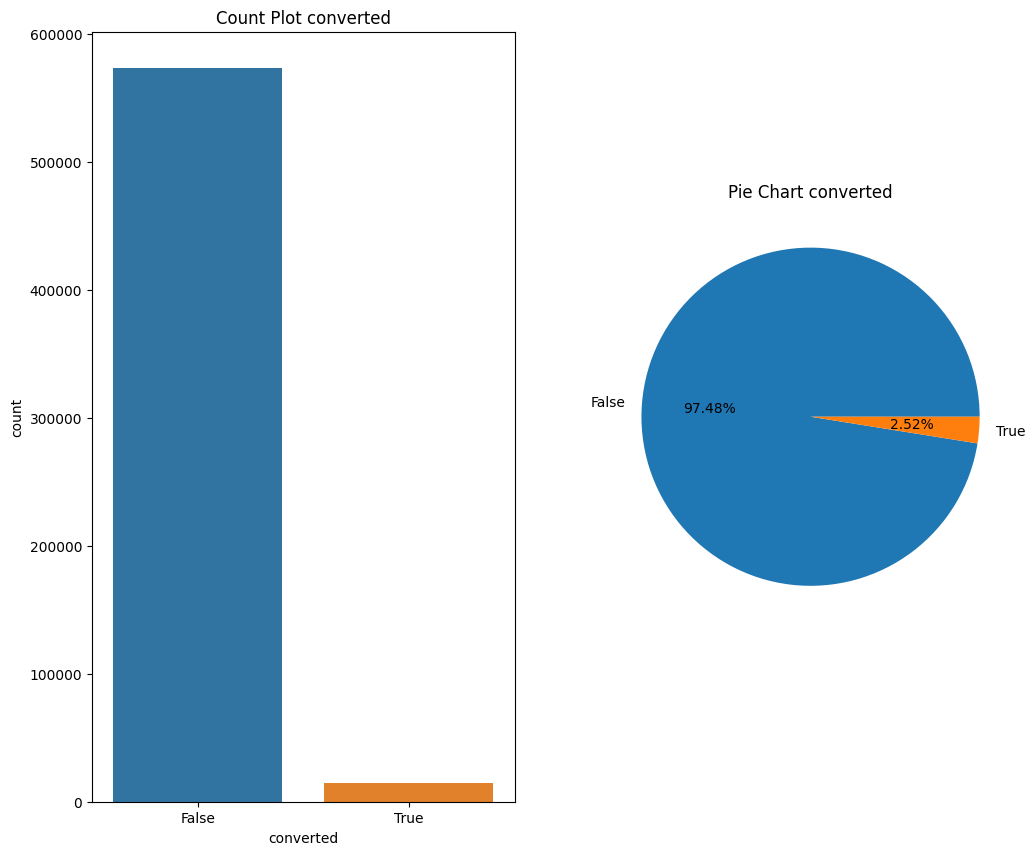

In [10]:
variable = 'converted'

plt.figure(figsize = (12, 10))
plt.subplot(1, 2, 1)
sns.countplot(x = variable, data = df_cat)
plt.title(f"Count Plot {variable}")

plt.subplot(1, 2, 2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels = counts.index, autopct = '%0.2f%%')
plt.title(f"Pie Chart {variable}")

Text(0.5, 1.0, 'Pie Chart most ads day')

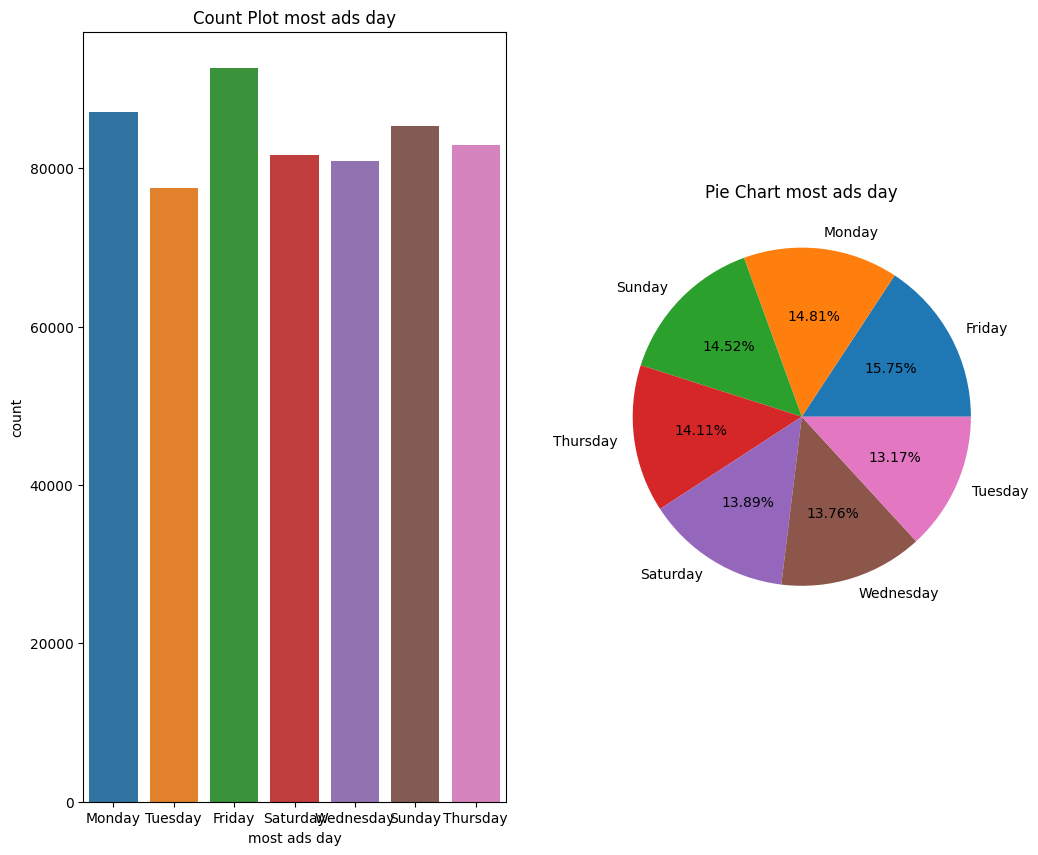

In [11]:
variable = 'most ads day'

plt.figure(figsize = (12, 10))
plt.subplot(1, 2, 1)
sns.countplot(x = variable, data = df_cat)
plt.title(f"Count Plot {variable}")

plt.subplot(1, 2, 2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels = counts.index, autopct = '%0.2f%%')
plt.title(f"Pie Chart {variable}")

Text(0.5, 1.0, 'Pie Chart most ads hour')

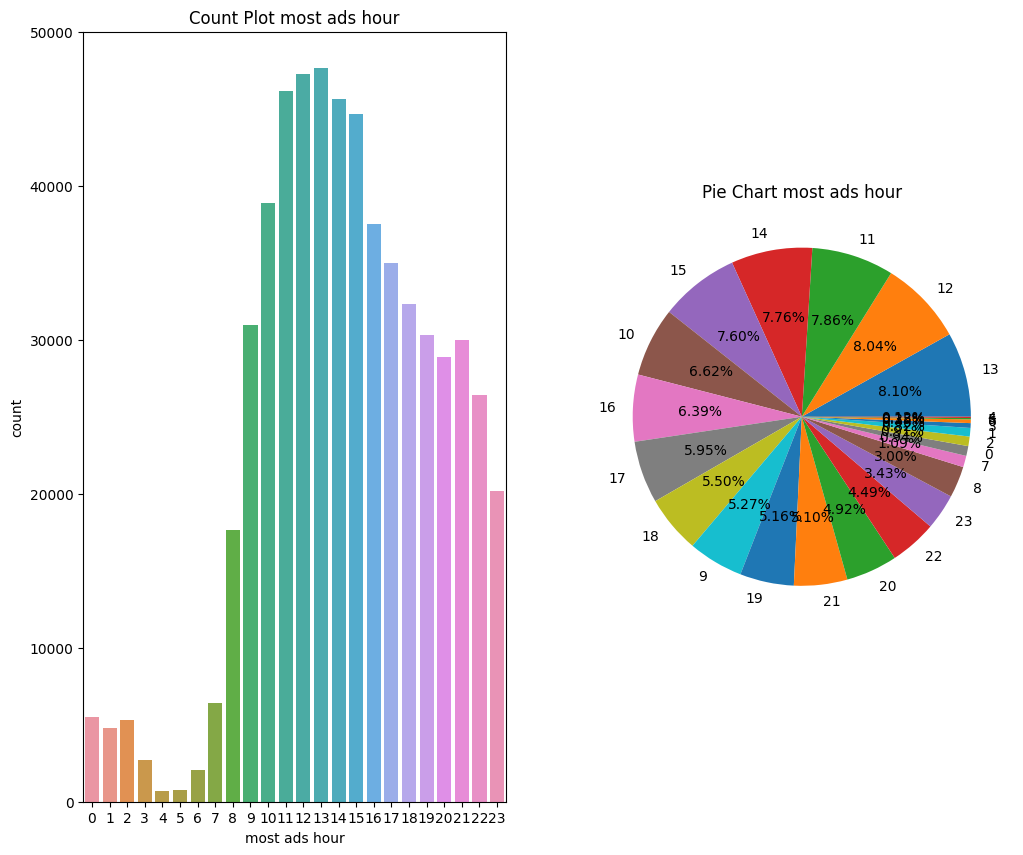

In [12]:
variable = 'most ads hour'

plt.figure(figsize = (12, 10))
plt.subplot(1, 2, 1)
sns.countplot(x = variable, data = df_cat)
plt.title(f"Count Plot {variable}")

plt.subplot(1, 2, 2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels = counts.index, autopct = '%0.2f%%')
plt.title(f"Pie Chart {variable}")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Box Plot total ads')

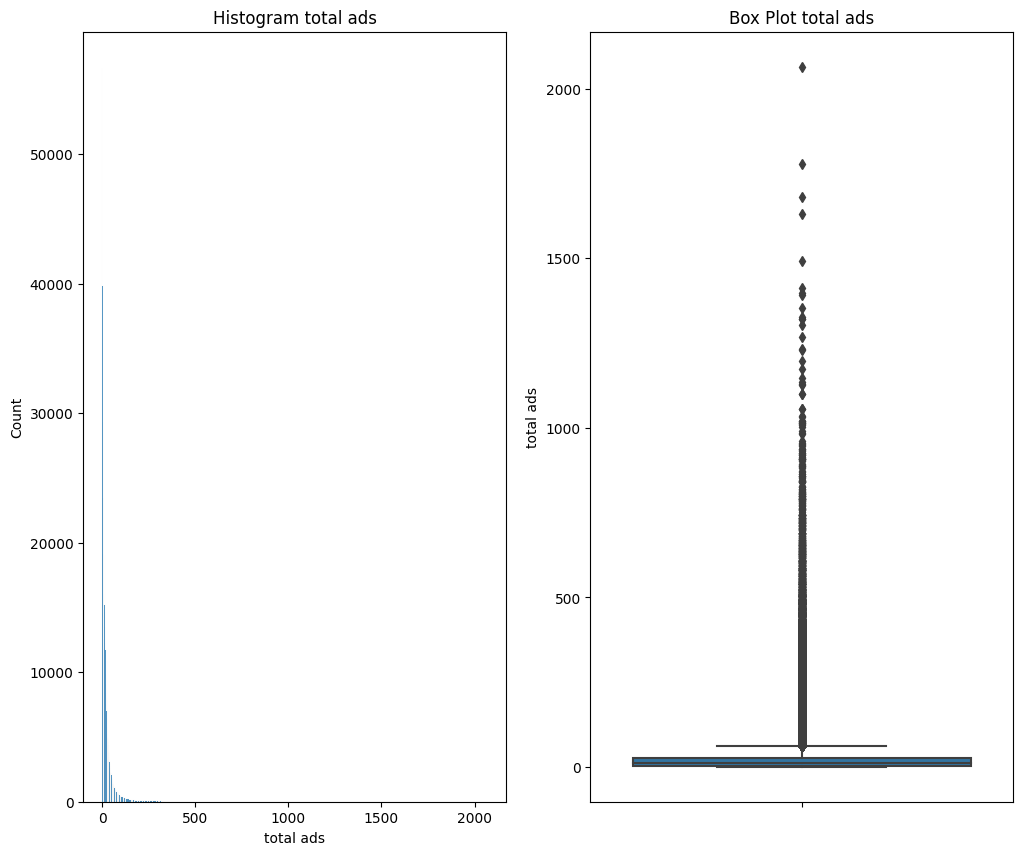

In [13]:
variable = 'total ads'       #numerical variable

plt.figure(figsize = (12, 10))
plt.subplot(1, 2, 1)
sns.histplot(x = variable, data = df)
plt.title(f"Histogram {variable}")

plt.subplot(1, 2, 2)
sns.boxplot(y = variable, data = df)
plt.title(f"Box Plot {variable}")


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Box Plot total ads')

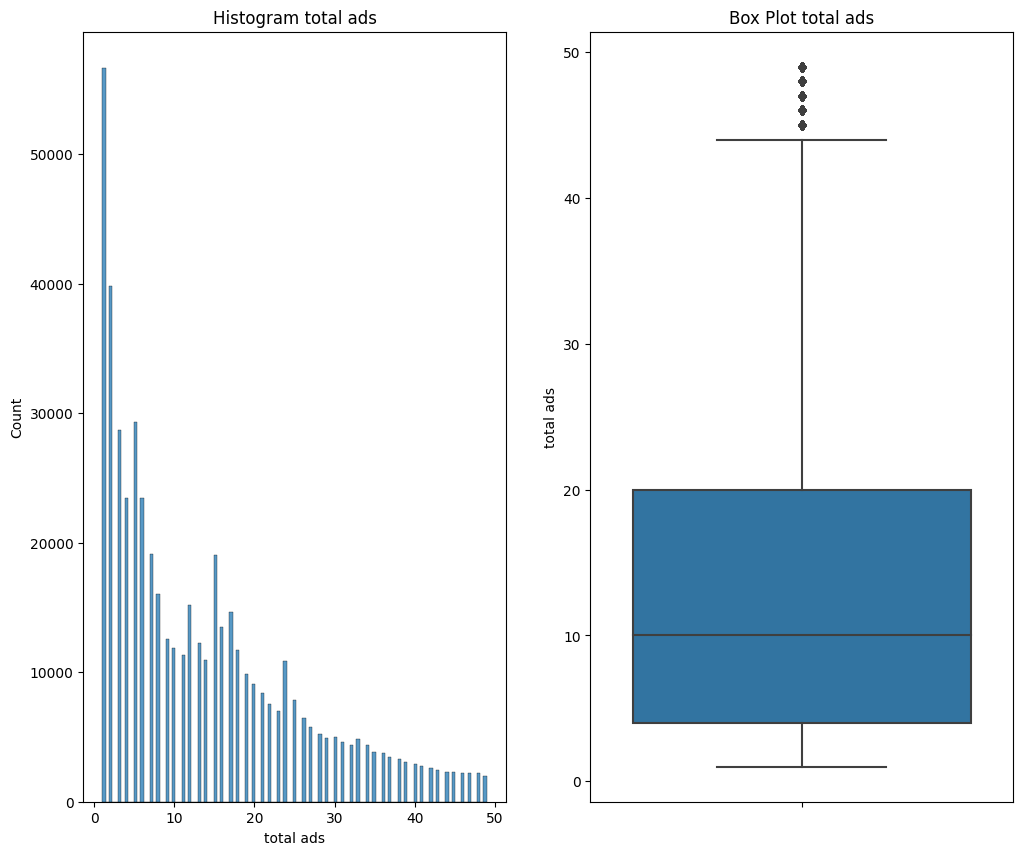

In [14]:
variable = 'total ads'       #numerical variable

plt.figure(figsize = (12, 10))
plt.subplot(1, 2, 1)
sns.histplot(x = variable, data = df[df['total ads'] < 50])
plt.title(f"Histogram {variable}")

plt.subplot(1, 2, 2)
sns.boxplot(y = variable, data = df[df['total ads'] < 50])
plt.title(f"Box Plot {variable}")


converted        False     True 
most ads day                    
Monday        0.967188  0.032812
Tuesday       0.970160  0.029840
Wednesday     0.975058  0.024942
Sunday        0.975524  0.024476
Friday        0.977788  0.022212
Thursday      0.978429  0.021571
Saturday      0.978949  0.021051


<Axes: xlabel='most ads day'>

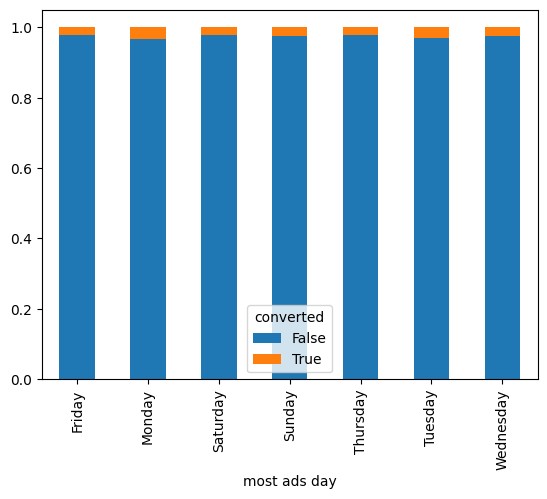

In [15]:
#Bivariate analysis 
ct_conversion_day = pd.crosstab(df['most ads day'], df['converted'], normalize = 'index')
print(ct_conversion_day.sort_values(by = True, ascending = False))
ct_conversion_day.plot.bar(stacked = True)

converted         False     True 
most ads hour                    
16             0.969228  0.030772
20             0.970197  0.029803
15             0.970347  0.029653
21             0.971077  0.028923
17             0.971790  0.028210
14             0.971937  0.028063
18             0.972620  0.027380
19             0.973280  0.026720
22             0.973895  0.026105
13             0.975323  0.024677
12             0.976172  0.023828
23             0.977338  0.022662
6              0.977756  0.022244
11             0.977884  0.022116
10             0.978479  0.021521
5              0.979085  0.020915
8              0.980484  0.019516
9              0.980809  0.019191
0              0.981575  0.018425
7              0.981889  0.018111
4              0.984765  0.015235
1              0.987089  0.012911
3              0.989548  0.010452
2              0.992687  0.007313


<Axes: xlabel='most ads hour'>

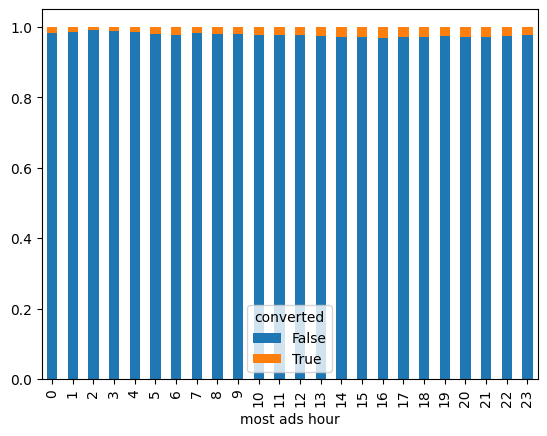

In [16]:
ct_conversion_day = pd.crosstab(df['most ads hour'], df['converted'], normalize = 'index')
print(ct_conversion_day.sort_values(by = True, ascending = False))
ct_conversion_day.plot.bar(stacked = True)

converted  False  True 
total ads              
1491         0.0    1.0
659          0.0    1.0
475          0.0    1.0
1354         0.0    1.0
564          0.0    1.0
...          ...    ...
570          1.0    0.0
569          1.0    0.0
568          1.0    0.0
567          1.0    0.0
2065         1.0    0.0

[807 rows x 2 columns]


<Axes: xlabel='total ads'>

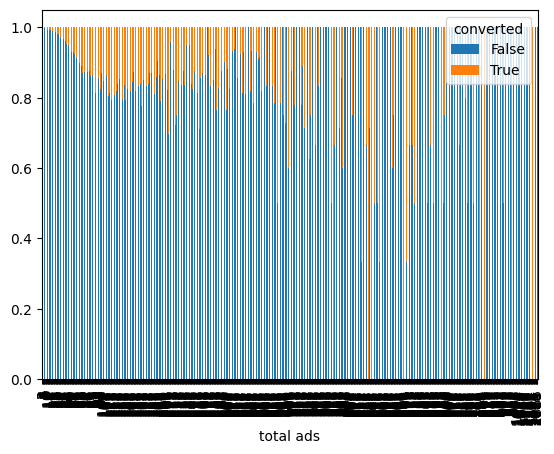

In [17]:
ct_conversion_day = pd.crosstab(df['total ads'], df['converted'], normalize = 'index')
print(ct_conversion_day.sort_values(by = True, ascending = False))
ct_conversion_day.plot.bar(stacked = True)

converted      False     True 
test group                    
ad          0.974453  0.025547
psa         0.982146  0.017854


<Axes: xlabel='test group'>

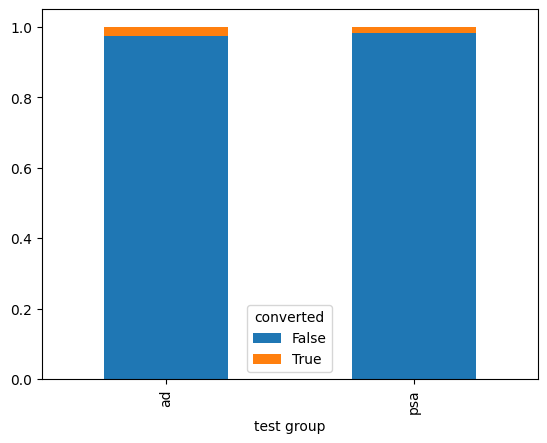

In [18]:
ct_conversion_day = pd.crosstab(df['test group'], df['converted'], normalize = 'index')
print(ct_conversion_day.sort_values(by = True, ascending = False))
ct_conversion_day.plot.bar(stacked = True)

<Axes: xlabel='converted', ylabel='total ads'>

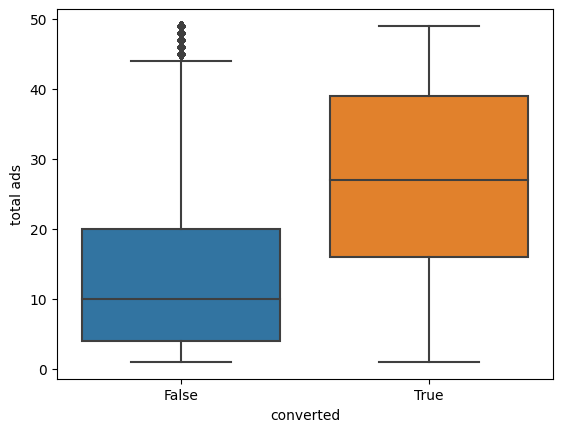

In [19]:
sns.boxplot(x = 'converted', y = 'total ads', data = df[df['total ads'] < 50])

In [20]:
#Statistical tests Null Hypothesis: no difference in conversion rates based on categorical features

from scipy.stats import chi2_contingency
alpha = 0.05 

for variable in df_cat.columns:
    if variable != 'converted':
        contingency_table = pd.crosstab(df_cat[variable], df_cat['converted'])
    chi2, p , _, _ = chi2_contingency(contingency_table)
    print(f"1\nChi2 test for {variable} vs. converted")
    print(f" The Chi2 value {chi2}")
    print(f"The p-value {p}")
    if p < alpha:
        print(f"The difference in conversion rates across {variable} is statistically significant")
    else:
        print(f"The difference in conversion rates across {variable} is statistically significant")


1
Chi2 test for test group vs. converted
 The Chi2 value 54.005823883685245
The p-value 1.9989623063390075e-13
The difference in conversion rates across test group is statistically significant
1
Chi2 test for converted vs. converted
 The Chi2 value 54.005823883685245
The p-value 1.9989623063390075e-13
The difference in conversion rates across converted is statistically significant
1
Chi2 test for total ads vs. converted
 The Chi2 value 48001.99019466958
The p-value 0.0
The difference in conversion rates across total ads is statistically significant
1
Chi2 test for most ads day vs. converted
 The Chi2 value 410.0478857936585
The p-value 1.932184379244731e-85
The difference in conversion rates across most ads day is statistically significant
1
Chi2 test for most ads hour vs. converted
 The Chi2 value 430.76869230822086
The p-value 8.027629823696771e-77
The difference in conversion rates across most ads hour is statistically significant


In [21]:
#for numerical variable, t test can be performed if distribution is normal